In [1]:
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from scipy.stats import ttest_rel
from scipy.stats import sem
from RZutilpy.figure import bar, plot, default_img_set, colorpalettable
default_img_set()
import pingouin 

In [2]:
subjects = 22 # 22 subjects
regions = 7 # 7 brain regions
brainregions = ["V1","V2","V3","V3A","hMT+","IPS"] # brain regions

# Load data
with open('../Metrics_fMRI.pkl', 'rb') as f:
    Metrics = pickle.load(f)

idx = np.array([3, 5]) # V3a and hMT+ regions
df_abs_pre = Metrics["df_abs_pre"][:,idx]
df_abs_post = Metrics["df_abs_post"][:,idx]
variance_pre = Metrics["variance_pre"][:,idx]
variance_post = Metrics["variance_post"][:,idx]
LFI_pre = Metrics["LFI_pre"]
LFI_post = Metrics["LFI_post"]
correlation_pre = Metrics["correlation_pre"][:,idx]
correlation_post = Metrics["correlation_post"][:,idx]
decoding_acc_pre = Metrics["decoding_acc_pre"]
decoding_acc_post = Metrics["decoding_acc_post"]
rotation  = Metrics["rotation"][:,idx]
PCA_LFI = Metrics["PCA_LFI"][:, idx, :]

In [3]:
decoding_acc_mean = np.vstack((decoding_acc_pre.mean(axis=0),decoding_acc_post.mean(axis=0))).T
decoding_acc_se = np.vstack((sem(decoding_acc_pre,axis=0),sem(decoding_acc_post,axis=0))).T
aLFI_mean = np.vstack((LFI_pre.mean(axis=0),LFI_post.mean(axis=0))).T
aLFI_se = np.vstack((sem(LFI_pre,axis=0),sem(LFI_post,axis=0))).T

decoding_acc_mean = np.vstack((decoding_acc_mean[:4,:], decoding_acc_mean[5:,:])) 
decoding_acc_se = np.vstack((decoding_acc_se[:4,:], decoding_acc_se[5:,:]))
aLFI_mean = np.vstack((aLFI_mean[:4,:], aLFI_mean[5:,:])) 
aLFI_se = np.vstack((aLFI_se[:4,:], aLFI_se[5:,:])) 

In [4]:
ryzcolor = colorpalettable('ryz1')
C0, C1, C0_alpha, C1_alpha = np.array(ryzcolor(0)), np.array(ryzcolor(1)),np.array(ryzcolor(0)), np.array(ryzcolor(1))
C0_alpha[-1] = 0.3
C1_alpha[-1] = 0.3

2
2


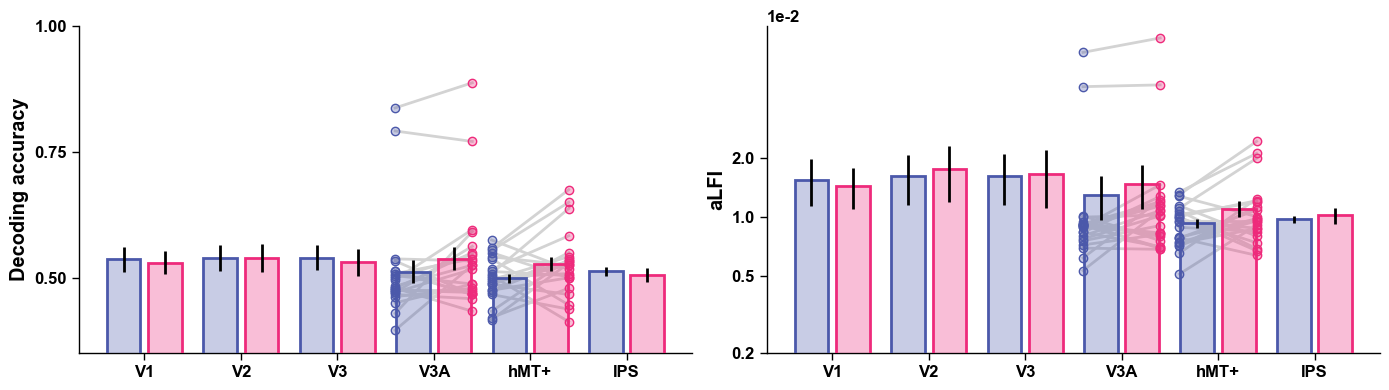

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
plt.sca(ax[0])
plot(np.array([2.6, 3.4]), np.vstack((decoding_acc_pre[:,3],decoding_acc_post[:,3])), fmt='-', color='lightgray')
plot(np.array([3.6, 4.4]), np.vstack((decoding_acc_pre[:,5],decoding_acc_post[:,5])), fmt='-', color='lightgray')
plot([2.6]*subjects, decoding_acc_pre[:,3], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([3.4]*subjects, decoding_acc_post[:,3], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
plot([3.6]*subjects, decoding_acc_pre[:,5], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([4.4]*subjects, decoding_acc_post[:,5], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)

bh = bar(np.arange(6), decoding_acc_mean, yerr=decoding_acc_se, ecolor='k', width=0.35, color=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)], linewidth=2, bargap=0.08, zorder=10)

ax[0].set_ylabel('Decoding accuracy')
ax[0].set_ylim([0.35, 1.0])
ax[0].set_yticks([0.5,0.75,1.0])
ax[0].set_yticklabels(["0.50","0.75","1.00"])
ax[0].set_xticks([0,1,2,3,4,5])
ax[0].set_xticklabels(brainregions)
ax[0].minorticks_off()

plt.sca(ax[1])
plot(np.array([2.6, 3.4]), np.vstack((LFI_pre[:,3],LFI_post[:,3])), fmt='-', color='lightgray')
plot(np.array([3.6, 4.4]), np.vstack((LFI_pre[:,5],LFI_post[:,5])), fmt='-', color='lightgray')
plot([2.6]*subjects, LFI_pre[:,3], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([3.4]*subjects, LFI_post[:,3], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
plot([3.6]*subjects, LFI_pre[:,5], fmt='o', markerfacecolor=C0_alpha, markeredgecolor=C0)
plot([4.4]*subjects, LFI_post[:,5], fmt='o', markerfacecolor=C1_alpha, markeredgecolor=C1)
bh = bar(np.arange(6), aLFI_mean, yerr=aLFI_se, ecolor='k', width=0.35, color=[C0_alpha,C1_alpha],edgecolor=[ryzcolor(0),ryzcolor(1)], linewidth=2, bargap=0.08, zorder=10)
ax[1].set_ylabel('aLFI')
ax[1].set_xticks([0,1,2,3,4,5])
ax[1].set_xticklabels(brainregions)
ax[1].set_yscale('log')
ax[1].set_yticks([2*1e-3, 5*1e-3, 1*1e-2, 2*1e-2])
ax[1].yaxis.set_major_formatter(plt.ScalarFormatter())
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax[1].minorticks_off()
# plt.show()

plt.savefig('Fig7_1.pdf')

In [22]:
print(ttest_rel(Metrics["decoding_acc_pre"], Metrics["decoding_acc_post"], alternative='less'))
print(ttest_rel(Metrics["LFI_pre"], Metrics["LFI_post"], alternative='less'))


# Also calculate the effect size for each metric
# Cohen's d
from pingouin import compute_effsize

for i_ROI in range(7):
    print(f'decoding accuracy: {compute_effsize(Metrics["decoding_acc_pre"][:,i_ROI], Metrics["decoding_acc_post"][:,i_ROI], paired=True)}')
    print(f'aLFI: {compute_effsize(Metrics["LFI_pre"][:,i_ROI], Metrics["LFI_post"][:,i_ROI], paired=True)}')
    print('')

TtestResult(statistic=array([ 0.53007916, -0.09606507,  0.71004551, -2.01125904,  0.35920629,
       -1.95392231,  0.61125337]), pvalue=array([0.69919127, 0.46218988, 0.75725668, 0.02865433, 0.63848633,
       0.03207933, 0.7262039 ]), df=array([21, 21, 21, 21, 21, 21, 21]))
TtestResult(statistic=array([ 0.83499529, -1.11821414, -0.36988   , -2.36205352, -0.7576944 ,
       -1.9904909 , -0.57337518]), pvalue=array([0.79344029, 0.13805237, 0.35758795, 0.01395392, 0.22852639,
       0.02985538, 0.28624019]), df=array([21, 21, 21, 21, 21, 21, 21]))
decoding accuracy: 0.05583505907953341
aLFI: 0.06525739698970746

decoding accuracy: -0.007551383857717757
aLFI: -0.05622156315344307

decoding accuracy: 0.07506893202644299
aLFI: -0.016683795810878196

decoding accuracy: -0.24501264839025125
aLFI: -0.1115938495686552

decoding accuracy: 0.05507483059317841
aLFI: -0.04055045110394393

decoding accuracy: -0.5027328924844281
aLFI: -0.47024798344971513

decoding accuracy: 0.14133774182603157
aLFI:

In [12]:
# Deleting the two outliers
V3A = [3]
ix = [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21]
print(ttest_rel(Metrics["decoding_acc_pre"][ix, V3A], Metrics["decoding_acc_post"][ix, V3A], alternative='less'))
print(ttest_rel(Metrics["LFI_pre"][ix, V3A], Metrics["LFI_post"][ix, V3A], alternative='less'))

TtestResult(statistic=-1.9387849730078512, pvalue=0.033763525548390114, df=19)
TtestResult(statistic=-2.120184914788735, pvalue=0.023689162986124036, df=19)
